In [15]:
import matplotlib.pyplot as plt
import random

In [51]:
def generate_column_partition(n, k, min_first=2):
    if k < 1:
        raise ValueError("Number of categories must be at least 1.")
    if n < min_first:
        raise ValueError("Total must be at least as large as the minimum first value.")

    min_first += 1
    remaining = n - min_first + 1

    # Generate k-1 non-negative integers that sum to `remaining`
    # This is done by generating (k-2) cut points between 0 and remaining,
    # and sorting them to form the segments
    cuts = sorted(random.sample(range(remaining + k - 1), k - 1))
    partition = [cuts[0]]
    for i in range(1, len(cuts)):
        partition.append(cuts[i] - cuts[i - 1])
    partition.append(remaining + k - 1 - cuts[-1])

    # Subtract 1 from each (stars and bars method)
    partition = [x - 1 for x in partition]

    # Prepend the fixed minimum for the first category
    partition[0] += min_first

    return partition

(array([1.783e+03, 1.557e+03, 1.313e+03, 1.172e+03, 9.450e+02, 7.450e+02,
        6.430e+02, 5.060e+02, 3.690e+02, 2.970e+02, 2.360e+02, 1.600e+02,
        1.200e+02, 7.500e+01, 4.700e+01, 2.300e+01, 6.000e+00, 2.000e+00,
        1.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <BarContainer object of 19 artists>)

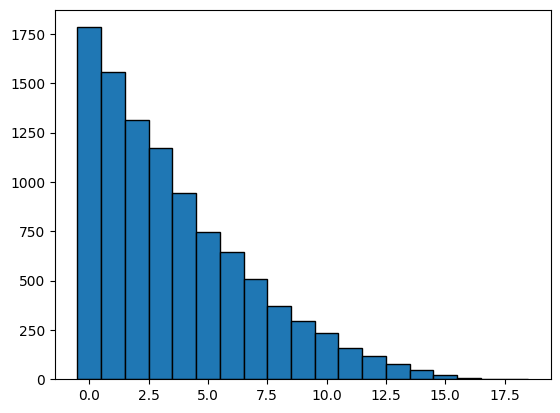

In [56]:
holder = []
for i in range(10000):
    lis = generate_column_partition(20, 5)
    holder.append(lis[2])

plt.hist(
    holder, bins=range(min(holder), max(holder) + 2), edgecolor="black", align="left"
)

In [57]:
lis

[5, 3, 2, 9, 1]

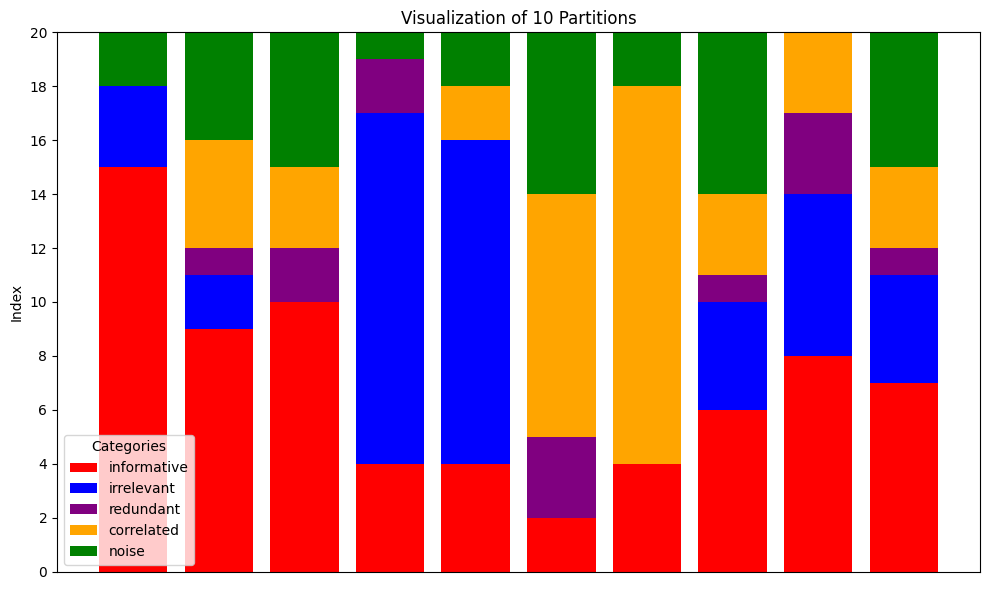

In [73]:
num_partitions = 10
n = 20
k = 5
partitions = [generate_column_partition(n, k) for _ in range(num_partitions)]

# Transpose the list to group categories
categories = list(
    zip(*partitions)
)  # Each sublist corresponds to one category across all partitions

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x = list(range(num_partitions))
bottom = [0] * num_partitions
colors = ["red", "blue", "purple", "orange", "green"]
labels = ["INFORMATIVE", "IRRELEVANT", "REDUNDANT", "CORRELATED", "NOISE"]

for i in range(k):
    ax.bar(
        x, categories[i], bottom=bottom, label=f"{labels[i].lower()}", color=colors[i]
    )
    bottom = [bottom[j] + categories[i][j] for j in range(num_partitions)]

ax.set_xticks([])  # Remove x-axis ticks
ax.tick_params(axis="x", bottom=False, labelbottom=False)  # Remove x-axis labels
ax.set_yticks(range(0, n + 1, 2))  # Y-axis ticks every 2 units
ax.set_ylabel("Index")
ax.set_title("Visualization of 10 Partitions")
ax.legend(title="Categories")
plt.tight_layout()
plt.show()